# _Python for Scientific Data Analysis_


#  AstroPy and AstroQuery

## Section 2a: Reading in Tables/Files

As before, we start off with the basic library import commands:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Also, for this section, we will be grabbing files from the ./sect2/code/files/ directory often.  So we save this as a variable

In [37]:
directory='./code/sect2/files/'

### astropy.io.ascii

The previous section first focused on reading in and writing astronomical image data stored in the FITS format using ``astropy.io.fits`` function. 

 ``astropy.io.ascii ``provides methods for reading and writing a wide range of ASCII data table formats via built-in Extension Reader Classes. The emphasis is on flexibility and convenience of use, although readers can optionally use a less flexible C-based engine for reading and writing for improved performance. 
 
 The import call goes like this:
        

In [38]:

 from astropy.io import ascii


 
 The official documentation goes into a lot of detail on all the different things ``ascii`` can do.  Specifically, it can handle a lot of different input file format names.  I'll include the most important ones below:
 
 * ``basic`` - Basic table with custom delimiters
 * ``cds`` - CDS format table
 * ``csv`` - Basic, except with comma-separated values
 * ``fixedwidth`` - fixed width
 * ``ipac`` - Looks like the following ...
 
 ```
|  column1   |  column2  | column3 |  Column Names (required)
|   double   |   double  |   int   | Data Types (standard)
|   unit     |   unit    |   unit  |   Data Units (optional)
|   null     |   null    |   null  |  Null Values (optional)
   165.466279    -34.704730      5    |     Data Rows (1 required)
 ```
 * ``latex``- a LaTeX table
 * ``mrt`` - AAS Machine-Readable Table format (i.e. what you get if you download a table file from a AAS Journals paper (e.g. Astrophysical Journal).

#### Reading in files
 
 The basic call for ``ascii.read`` is:
 
 ```
 variable_name=ascii.read('[file name]',
    delimiter=[delimiter],format=[format_name])
 ```
 
 Two examples:
 
 ``a=ascii.read('data.csv',format='csv')``

 Now you have two options when you read in a table.  First, you can _tell_ astropy which format your table is in.  This can be done through the ``format`` keyword.   You can also give clues.  E.g. 
 
 
 ``a=ascii.read('data.txt',delimiter=',')`` ...
 
Setting ``delimiter=','`` then tells Astropy that you have a csv file (because you have comma-separated values for your table entries, aka a .csv file).

#### _Examples_

Below are several examples of reading in files with ``ascii``

* A csv file

In [39]:
infile0='imaged_planets_v6.csv'

def readinplanetfile(infile=infile0):
    
    data=ascii.read(directory+infile0)
    #print(data[0:5])
    #print(data['pl_name'][10:30])
    
readinplanetfile()

#Or


#here, the code uses the delimiter keyword to figure out the type of table
def readinplanetfile2(infile=infile0):
    
    data=ascii.read(directory+infile0,delimiter=',')
    #print(repr((data[3])[0:15]))
    print(data[0:14])
    
readinplanetfile2(infile='imaged_planets_v6.txt')


          pl_name                     hostname         ... sy_gaiamagerr2
---------------------------- ------------------------- ... --------------
     1RXS J160929.1-210524 b     1RXS J160929.1-210524 ...      -0.002275
2MASS J01033563-5515561 AB b 2MASS J01033563-5515561 A ...             --
   2MASS J01225093-2439505 b   2MASS J01225093-2439505 ...      -0.001151
   2MASS J02192210-3925225 b   2MASS J02192210-3925225 ...      -0.000624
 2MASS J21402931+1625183 A b 2MASS J21402931+1625183 A ...      -0.004861
   2MASS J22362452+4751425 b   2MASS J22362452+4751425 ...      -0.000737
                    51 Eri b                    51 Eri ...     -0.0023075
                    AB Pic b                    AB Pic ...      -0.001332
    CFBDSIR J145829+101343 b    CFBDSIR J145829+101343 ...             --
            CFHTWIR-Oph 98 b          CFHTWIR-Oph 98 A ...             --
                   CHXR 73 b                   CHXR 73 ...      -0.001396
                COCONUTS-2 b          

* a latex file

In [40]:
data=ascii.read(directory+'startable.tex')
#data[0:2] #prints out the first 5 rows of data
#see what happens when you do this ...
#data=ascii.read(directory+'startable.tex',format='csv')
data[0:2]

Name,RA,DEC,V,H
str8,str10,str10,float64,float64
HIP950,0:11:44.16,-35:07:58.,5.239,4.159
HIP5661,1:12:45.6,-37:51:25.,5.934,5.288


* an ipac table file

In [41]:
data=ascii.read(directory+'wise_allwise_hip99770.tbl',format='ipac')

#data[0:2]
#data[0:2]['ra'] #prints out the first two right ascensions
data['dec']

36.806611
36.8139119
36.8145549
36.8005263
36.7972808


* an mrt table file

In [42]:
# mrt table
data=ascii.read(directory+'mgmembers.txt',format='mrt')
data[0:5]

Assoc,Main,SpT,RAh,RAm,RAs,DE-,DEd,DEm,DEs,pmRA,e_pmRA,pmDE,e_pmDE,RVel,e_RVel,Dist,e_Dist,Comp,r_SpT,r_pmX,r_RVel,r_Dist
,,,h,min,s,,deg,arcmin,arcsec,mas / yr,mas / yr,mas / yr,mas / yr,km / s,km / s,pc,pc,,,,,
str6,str27,str13,int64,int64,float64,str1,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str11,str3,str3,str10,str3
ABDMG,2MASS J00192626+4614078,M8{beta},0,19,26.26,--,46,14,7.8,119.4,0.9,-75.4,0.9,-20.0,3.0,39.0,2.0,--,1,2,3,2
ABDMG,BD+54 144 A,F8V,0,45,51.06,--,54,58,39.1,96.4,0.03,-73.97,0.04,-15.0,2.0,50.3,0.9,--,4,5,6,5
ABDMG,BD+54 144 B,K3,0,45,51.23,--,54,58,40.8,--,--,--,--,--,--,--,--,[COMPANION],7,-,-,-
ABDMG,2MASS J00470038+6803543,L6-L8{gamma},0,47,0.39,--,68,3,54.4,385.0,1.0,-201.0,1.0,-20.0,1.0,12.2,0.3,--,-,2,8,2
ABDMG,G 132-51 B,M2.6,1,3,42.23,--,40,51,13.6,132.0,5.0,-164.0,5.0,-10.6,0.3,30.0,2.0,--,9,9,9,9


#### Writing Tables

The ``ascii.write`` function writes a data table as an ascii table formatted in various ways.

The key step is to create a ``Table()`` object which you then populate with entries and execute an ``ascii.write`` command on the table.   

Below is a simple example

In [43]:
#a simple table
from astropy.table import Table

entries=Table()
#some fake sinusoidal data
x = np.linspace(0, 2 * np.pi, 20)
y= (np.linspace(0,2*np.pi,20))
#[:,None]
#[:,None]

def f(x,y):
 return np.sin(x)+np.cos(y)

X,Y=np.meshgrid(x,y)

entries['x']=X.flatten()
entries['y']=Y.flatten()
entries['f(x,y)']=f(X,Y).flatten()
filename='output2.dat'
filename2='output2.csv'
filename3='output2.tex'
ascii.write(entries,directory+filename,overwrite=True,format='basic')
ascii.write(entries,directory+filename2,overwrite=True,format='csv')
ascii.write(entries,directory+filename3,overwrite=True,format='latex')

This writes the data to three tables: a simple ascii table, a csv table, and a LaTeX table.

The full API for ``ascii.write`` is more involved and gives you control over the column formats, names, etc.   See here: [https://docs.astropy.org/en/stable/io/ascii/write.html]().   Key parameters are:

* delimiter (we already covered this)
* formats (a dictionary of data type converters)
* names (list of output column names)
* fill values (if there are missing values, fill with this symbol)

Below is an example:
    

In [44]:


colnames=['x','y','f(x,y)']
#colformat={'x':'%.5f', 'y':'%.5f', 'f(x,y)':'%.5f'}
colformat={colnames[0]:'%.5f', colnames[1]:'%.5f', colnames[2]:'%.5f'}
filename4='output2v2.dat'
ascii.write([X.flatten(),Y.flatten(),f(X,Y).flatten()],
            directory+filename4,names=colnames,formats=colformat,overwrite=True)


This prints out a formatted table with columns of x, y, and f(x,y).   We do not have to first create a Table object: instead, we can just put the columns in closed [ ] in a list. 
 

## Section 2b: Units, Constants and Coordinates
### Astropy Quantities: Units and Constants

Astropy allows the ability to give variables the attribute of ``units``.   E.g. instead of just a variable that represents a length, astropy saves it as an object with an attribute of meters (or microns or kilometers, etc.).   This is useful for a number of things, including debugging and automatic unit conversion without having to do much thinking.  Very helpful.

Similarly, astropy saves a large number of ``constants``, so you do not have to reenter them. 

To load these modules, add the following lines to code:

In [45]:
import astropy.units as u #since 'units' takes too long to type

#from astropy.constants import [name of the constants]
#an example ... gravitational constant, Planck constant, Boltzmann's constant
from astropy.constants import G,h,k_B

To make ``units`` and ``constants`` work with plotting routines, you also should ``from astropy.visualization import quantity_support``.  

The official tutorial on units and constants in astropy is very good, so I will repeat it with only minor modifications here.

For reference, the full list of units is here:

[https://kbarbary-astropy.readthedocs.io/en/latest/units/index.html]()

and constants here:

[https://docs.astropy.org/en/stable/constants/index.html#module-astropy.constants]()
 

Units can then be accessed as **`u.<unit>`**.  For example, the meter unit is:

In [46]:
u.m

Unit("m")

Variables called using the units subpackage have docstring capability.   To access, the doc string (which explains what the variable is all about) do **`u.<unit>`.__doc__**.  E.g.

In [47]:
print(u.m.__doc__)
print(u.pc.__doc__)
print(u.kg.__doc__)

meter: base unit of length in SI
parsec: approximately 3.26 light-years.
kilogram: base unit of mass in SI.


You can also access the physical type of a unit:

In [48]:
print(u.m.physical_type)
print(u.kg.physical_type)

length
mass


Units can also have aliases:

In [49]:
print(u.m.aliases)
print(u.arcsec.aliases)

['meter']
['arcsecond']


By default, ``units`` uses Si and cgs units.    You can use imperial units by attaching the ``imperial`` prefix:

In [50]:
#u.inch #this doesn't work
u.imperial.inch #this works

Unit("inch")

#### _Quantities and Units_

When you use ``units`` you store a variable that has both a ``value`` and a ``unit`` (naturally).   Often, if you try to do multiplication with a variable generated from ``units`` you will get errors thrown: what you really want is the ``value`` of the unit.  Other times, you are interested in just the unit.  

To return these properties ...

Value -   type **`<variable name>.value`**

Unit -    type **`<variable name>.unit`**

E.g.

In [51]:
r_planet=16.9*u.au

r_planet_val=r_planet.value
print(r_planet_val*5)
print(np.log10(r_planet_val*5))

r_planet_unit=r_planet.unit
print(r_planet_unit)

84.5
1.9268567089496924
AU


#### _Unit Conversions_

This is where ``units`` becomes the most useful, in my opinion.   

To convert units you add the property ``.to(unit.[unitname])``

E.g.

In [52]:
r_planet=16.9*u.au

r_planet_km=r_planet.to(u.km)
print(r_planet_km)

#confirm manually
#16.9x 1.496e8 = 2.582e9

2528204014.8299994 km


### Examples

1. Galaxy mass

In this first example, we will use ``Quantity`` objects to estimate a hypothetical galaxy's mass, given its half-light radius and radial velocities of stars in the galaxy.

Let's assume that we measured the half-light radius of the galaxy to be 29 pc projected on the sky at the distance of the galaxy. This radius is often called the "effective radius", so we'll store it as a ``Quantity`` object with the name ``R_eff``. 

We can create a Quantity object by multiplying the value with its unit. Units are accessed as u."unit", in this case u.pc.

In [53]:
R_eff=29*u.pc
print("the value is",R_eff.value)
print("the unit is",R_eff.unit)

the value is 29.0
the unit is pc


Note, this is a sleek way of creating quantity objects.  The more verbose way is

In [54]:
R_eff=u.Quantity(29,unit=u.pc)

Now, you can access both the value and unit of a ``Quantity`` using the ``value`` and ``unit`` attributes.  E.g.

In [55]:

print("""Half light radius
value: {0}
unit: {1}""".format(R_eff.value, R_eff.unit))
#prints out...
#Half light radius
#value:29.0
#unit: pc

#slightly less elegant way...
print("The Half light radius value is {0:.1f} and unit is {1:s}".format(R_eff.value,R_eff.unit))
#prints out ...
#The Half light radius value is 29.0 and unit is pc


Half light radius
value: 29.0
unit: pc
The Half light radius value is 29.0 and unit is pc


The half-light radius is in parsecs.  We can convert this to any other length unit.  E.g.

In [56]:

print("{0:.3g}".format(R_eff.to(u.m))) # meters
#8.95e+17 m
print("{0:.3g}".format(R_eff.to(u.lyr))) # light-years
#94.6 lyr
print("{0:.3g}".format(R_eff.to(u.um))) # microns
#8.95e+23 um


8.95e+17 m
94.6 lyr
8.95e+23 um


Next, we'll first create a synthetic dataset of radial velocity measurements, assuming a normal distribution with a mean velocity of 206 km/s and a velocity dispersion of 4.3 km/s.

In [57]:
vmean = 206
sigin = 4.3
v = np.random.normal(vmean, sigin, 500)*u.km/u.s

(array([0.01072812, 0.00357604, 0.00715208, 0.00357604, 0.        ,
        0.02145625, 0.00715208, 0.00715208, 0.03933645, 0.02145625,
        0.04291249, 0.01430416, 0.05006458, 0.03218437, 0.06436874,
        0.09297707, 0.06794478, 0.07152082, 0.11443332, 0.07152082,
        0.09655311, 0.07152082, 0.10012915, 0.09297707, 0.09297707,
        0.07867291, 0.07509686, 0.07509686, 0.05006458, 0.0607927 ,
        0.04648854, 0.02503229, 0.03218437, 0.03576041, 0.02503229,
        0.02503229, 0.01430416, 0.01430416, 0.01072812, 0.00357604,
        0.00357604, 0.        , 0.00357604, 0.00357604, 0.        ,
        0.        , 0.        , 0.00357604, 0.        , 0.00357604]),
 array([193.54527173, 194.10454941, 194.66382708, 195.22310476,
        195.78238243, 196.34166011, 196.90093778, 197.46021546,
        198.01949313, 198.57877081, 199.13804848, 199.69732616,
        200.25660383, 200.81588151, 201.37515918, 201.93443686,
        202.49371453, 203.05299221, 203.61226989, 204.17154756

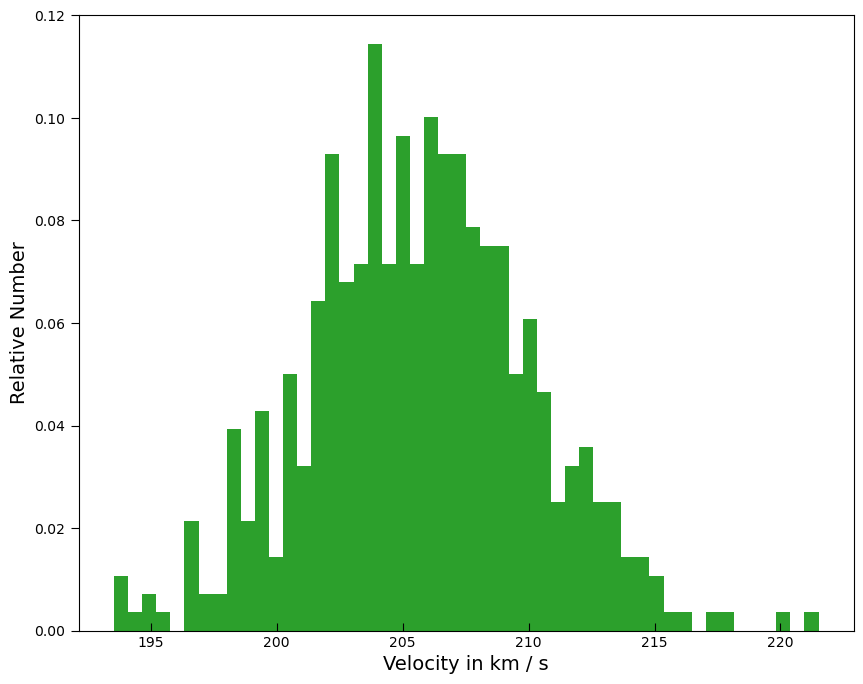

In [58]:
from matplotlib import ticker
fig,axes=plt.subplots(figsize=(10,8))
axes.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
axes.tick_params(which='both', axis='x',direction='in')
axes.tick_params(which='major',length=6)
axes.tick_params(which='minor',length=3)
axes.set_xlabel('Velocity in {0:s}'.format(v.unit),fontsize=14)
axes.set_ylabel('Relative Number',fontsize=14)

axes.hist(v.value,bins=50,density=True,color='tab:green')


And then convert the radial-velocities to m/s

In [59]:
#print("First 10 radial velocity measurements: in {0} km/s".format(v.value[:10]))
#print("First 10 radial velocity measurements: {0} {1}".format(v[:10],v.to(u.m/u.s)[:10]))
print("First 10 radial velocity measurements:\n {0} km/s \n or {1} m/s".format(v.value[:10],v.to(u.m/u.s).value[:10]))
#First 10 radial velocity measurements: [197.75728427 208.75234195 209.30692068 210.00891746 204.54189052
# 204.62432297 211.97852361 216.22527279 208.21670381 215.05119579] [197757.28427385 208752.34194905 209306.92068342 210008.91745652
# 204541.89052166 204624.32297168 211978.52360975 216225.27279323
# 208216.70380613 215051.19578812] m / s
#print(v.value[:10])

First 10 radial velocity measurements:
 [201.94312327 208.26955675 210.33168742 205.01193593 197.8677842
 210.38561628 206.83721974 207.87356239 202.99171448 203.60090842] km/s 
 or [201943.12327382 208269.55674675 210331.68741881 205011.93593451
 197867.78419852 210385.6162779  206837.21974023 207873.56239415
 202991.71447949 203600.90842073] m/s


One can ocassionally run into issues when attempting to plot Quantity objects with matplotlib libraries. It is always possible to fix this by passing the value array (e.g., v.value) to matplotlib functions. However, calling the astropy.visualization.quantity_support() function will change the settings on your matplotlib session to better handle astropy Quantity objects:

``quantity_support()``

Now we can plot a histogram of the velocity dataset. Note that, due to calling quantity_support, the x-axis is automatically labeled with the correct units.

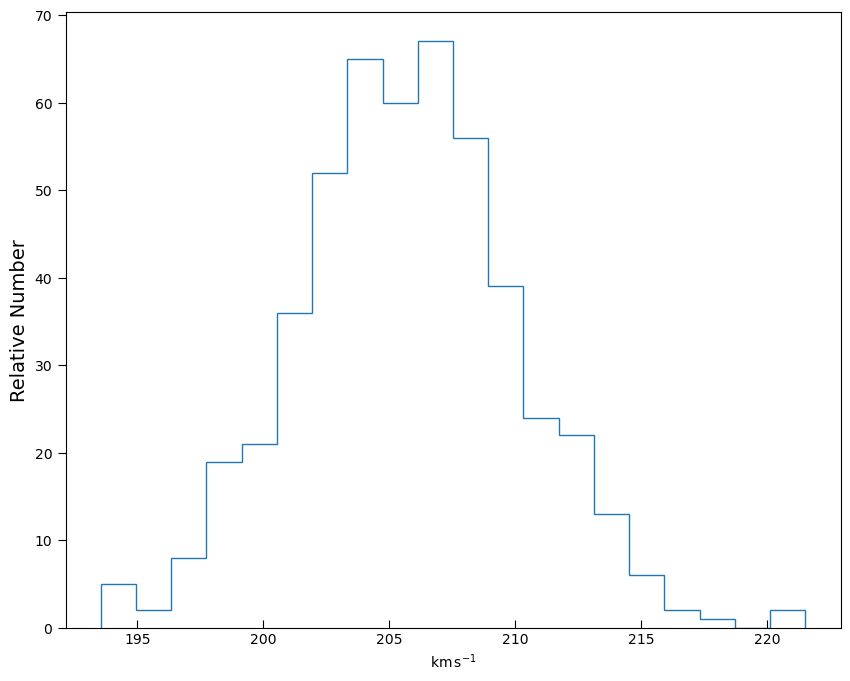

In [60]:
from astropy.visualization import quantity_support
def plot_v():
 fig,axes=plt.subplots(figsize=(10,8))
 quantity_support()

 axes.tick_params(which='both', axis='x',direction='in')
 axes.tick_params(which='major',length=6)
 axes.tick_params(which='minor',length=3)
 axes.set_ylabel('Relative Number',fontsize=14)
 axes.hist(v,bins='auto',histtype='step')
 #plt.show()

plot_v()



Now we can calculate the velocity dispersion of the galaxy. This demonstrates how you can perform basic operations like subtraction and division with Quantity objects, and also use them in standard numpy functions such as mean() and size(). They retain their units through these operations just as you would expect them to.

In [61]:

sigma = np.sqrt(np.sum((v - np.mean(v))**2) / np.size(v))
print("Velocity dispersion: {0:.2f}".format(sigma))
#Velocity dispersion: 4.27 km / s


Velocity dispersion: 4.40 km / s


Note how we needed to use numpy square root function, because the resulting velocity dispersion quantity is a numpy array. If we used the python standard math library's sqrt function instead, we get an error.

In [62]:
sigma_scalar = np.sqrt(np.sum((v - np.mean(v))**2) / len(v))
print(sigma_scalar)

4.395498035701382 km / s


In general, you should only use numpy functions with Quantity objects, not the math equivalents, unless you are sure you understand the consequences.

Now for the actual mass calculation. If a galaxy is pressure-supported (for example, an elliptical or dwarf spheroidal galaxy), its mass within the stellar extent can be estimated using a straightforward formula: M1/2=4σ2Reff/G
. There are caveats to the use of this formula for science -- see Wolf et al. 2010 for details. For demonstrating Quantity, you can accept that this is often good enough. For the calculation, we can multiply the quantities together, and astropy will keep track of the units.

In [63]:

M = 4*sigma**2*R_eff/G
print(M)
#30300318360313.01 kg km2 pc / m3


33579053172544.63 km2 kg pc / m3


The result is in a composite unit, so it's not really obvious it's a mass. However, it can be decomposed to cancel all of the length units (km2pc/m3) using the decompose() method.

In [64]:
M.decompose()
#9.349701307646912e+35 kg

<Quantity 1.03614132e+36 kg>

We can also easily express the mass in whatever form you like -- solar masses are common in astronomy, or maybe you want the default SI and CGS units.

In [65]:

print("""Galaxy mass
in solar units: {0:.3g}
SI units: {1:.3g}
CGS units: {2:.3g}""".format(M.to(u.Msun), M.si, M.cgs))

#Galaxy mass
# in solar units: 4.98e+05 solMass
# SI units: 9.9e+35 kg
# CGS units: 9.9e+38 g


Galaxy mass
in solar units: 5.21e+05 solMass
SI units: 1.04e+36 kg
CGS units: 1.04e+39 g


Or, if you want the log of the mass, you can just use np.log10 as long as the logarithm's argument is dimensionless.

In [66]:

print(np.log10(M.value))
#13.488440727046973
print(np.log10(M.to_value(u.Msun)))
#5.668423518011041


13.526068446187484
5.71691308104895


However, you can't take the log of something with units, as that is not mathematically sensible. So ``np.log10(M)`` will trigger an error.

### Astropy Coordinates

[note: as in the prior section, the official documentation/tutorials on astropy for _coordinates_ is really good.  So much of the discussion will basically copy that].

The _**coordinates**_ package provides classes for representing a variety of celestial/spatial coordinates and their velocity components, as well as tools for converting between common coordinate systems in a uniform way.

#### _SkyCoord_

The best way to start using coordinates is to use the SkyCoord class. SkyCoord objects are instantiated by passing in positions (and optional velocities) with specified units and a coordinate frame. Sky positions are commonly passed in as Quantity objects and the frame is specified with the string name.

To create a SkyCoord object to represent an ICRS (Right ascension [RA], Declination [Dec]) sky position, the major import command is ``from astropy.coordinates import SkyCoord``.  Below are two simple demonstrations:

In [67]:

import astropy.units as u
from astropy.coordinates import SkyCoord
c1 = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c2 = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

print(c1)
print(c2)

c1.ra
c1.dec

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>


<Latitude 41.2 deg>

Note that in the first case, you do not need to multiply by u.[unit], as AstroPy interprets the two strings directly.   Similarly, writing coordinate strings in degrees:minutes:seconds works.   E.g. ``SkyCoord('00d42m30s', '+41d12m00s', frame='icrs')``.  Angle units must be specified for all components, either by passing in a Quantity object (e.g., ``10.5*u.degree``), by including them in the value (e.g., ``'+41d12m00s'``), or via the ``unit`` keyword.

The right ascension and declination for the object c can then be accessed as a property of c: e.g. ``c.ra`` or ``c.dec``.  

SkyCoord and all other coordinates objects also support array coordinates. These work in the same way as single-value coordinates, but they store multiple coordinates in a single object. When you are going to apply the same operation to many different coordinates (say, from a catalog), this is a better choice than a list of SkyCoord objects, because it will be much faster than applying the operation to each SkyCoord in a for loop. Like the underlying ndarray instances that contain the data, SkyCoord objects can be sliced, reshaped, etc., and can be used with functions like numpy.moveaxis, etc., that affect the shape:

In [68]:

c = SkyCoord(ra=[10, 11, 12, 13]*u.degree, dec=[41, -5, 42, 0]*u.degree)
print(c)
#<SkyCoord (ICRS): (ra, dec) in deg
#    [(10., 41.), (11., -5.), (12., 42.), (13.,  0.)]>
c[0]
##<SkyCoord (ICRS): (ra, dec) in deg
#    (11., -5.)>
c.reshape(2, 2)
#<SkyCoord (ICRS): (ra, dec) in deg
#    [[(10., 41.), (11., -5.)],
#     [(12., 42.), (13.,  0.)]]>
#np.roll(c, 1)
#<SkyCoord (ICRS): (ra, dec) in deg
#    [(13.,  0.), (10., 41.), (11., -5.), (12., 42.)]>


<SkyCoord (ICRS): (ra, dec) in deg
    [(10., 41.), (11., -5.), (12., 42.), (13.,  0.)]>


<SkyCoord (ICRS): (ra, dec) in deg
    [[(10., 41.), (11., -5.)],
     [(12., 42.), (13.,  0.)]]>

SkyCoord also works with named variables.   E.g. listing the HMSDMS coordinates for several stars as tuples and then reading them into SkyCoord.

#### _Coordinate Access_

Once you have a coordinate object you can access the components of that coordinate (e.g., RA, Dec) to get string representations of the full coordinate.

The component values are accessed using (typically lowercase) named attributes that depend on the coordinate frame (e.g., ICRS, Galactic, etc.). For the default, ICRS, the coordinate component names are ra and dec.   you can further list attributes of attributes to get combinations of coordinates.

In [69]:

c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree)
print(c.ra)
#<Longitude 10.68458 deg>
print(c.ra.hour )

#0.7123053333333335

print(c.ra.hms  )
#hms_tuple(h=0.0, m=42.0, s=44.299200000000525)

print(c.dec.degree  )
#41.26917

print(c.dec.radian)
#0.7202828960652683


10d41m04.488s
0.7123053333333335
hms_tuple(h=0.0, m=42.0, s=44.299200000000525)
41.26917
0.7202828960652683


Coordinates can be converted to strings using the ``to_string()`` method:

In [70]:

print(c.to_string('decimal'))
#'10.6846 41.2692'
print(c.to_string('dms'))
#'10d41m04.488s 41d16m09.012s'

print(c.to_string('hmsdms'))
#00h42m44.2992s +41d16m09.012s


10.6846 41.2692
10d41m04.488s 41d16m09.012s
00h42m44.2992s +41d16m09.012s


#### _Transformation_

One convenient way to transform to a new coordinate frame is by accessing the appropriately named attribute.

To get the coordinate in the Galactic frame use:

In [71]:

c_icrs = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
print(c_icrs.galactic  )
#<SkyCoord (Galactic): (l, b) in deg
#   (121.17424181, -21.57288557)>


<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>


For more control, you can use the transform_to method, which accepts a frame name, frame class, or frame instance:

    

In [72]:

c_fk5 = c_icrs.transform_to('fk5')
#<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
#    (10.68459154, 41.26917146)>
print(c_fk5)
from astropy.coordinates import FK5
c_fk5.transform_to(FK5(equinox='J2010')) 
#<SkyCoord (FK5: equinox=J1975.000): (ra, dec) in deg
#    (10.34209135, 41.13232112)>


<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (10.68459154, 41.26917146)>


<SkyCoord (FK5: equinox=J2010.000): (ra, dec) in deg
    (10.82183569, 41.32386454)>

This form of transform_to also makes it possible to convert from celestial coordinates to AltAz coordinates, allowing the use of SkyCoord as a tool for planning observations. For a more complete example of this, see Determining and plotting the altitude/azimuth of a celestial object.

#### _Representation_

So far we have been using a spherical coordinate representation in all of our examples, and this is the default for the built-in frames. Frequently it is convenient to initialize or work with a coordinate using a different representation such as Cartesian or Cylindrical. This can be done by setting the representation_type for either SkyCoord objects or low-level frame coordinate objects.

To initialize or work with a coordinate using a different representation such as Cartesian or Cylindrical:

    

In [73]:

c = SkyCoord(x=1, y=2, z=3, unit='kpc', representation_type='cartesian')
print(c.x, c.y, c.z )
#(<Quantity 1. kpc>, <Quantity 2. kpc>, <Quantity 3. kpc>)

c.representation_type = 'cylindrical'
print(c)
#<SkyCoord (ICRS): (rho, phi, z) in (kpc, deg, kpc)
#   (2.23606798, 63.43494882, 3.)>



1.0 kpc 2.0 kpc 3.0 kpc
<SkyCoord (ICRS): (rho, phi, z) in (kpc, deg, kpc)
    (2.23606798, 63.43494882, 3.)>


#### _Distance_

SkyCoord and the individual frame classes also support specifying a distance from the frame origin. The origin depends on the particular coordinate frame; this can be, for example, centered on the earth, centered on the solar system barycenter, etc.

Two angles and a distance specify a unique point in 3D space, which also allows converting the coordinates to a Cartesian representation:

    

In [74]:

 c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, distance=770*u.kpc)

 c.ra
 c.dec
 print(c.cartesian.x  )
 #<Quantity 568.71286542 kpc>

 print(c.cartesian.y)
 #<Quantity 107.3008974 kpc>

 print(c.cartesian.z  )
 #<Quantity 507.88994292 kpc>


568.7128654235231 kpc
107.3008974042025 kpc
507.88994291875713 kpc


With distances assigned, SkyCoord convenience methods are more powerful, as they can make use of the 3D information. For example, to compute the physical, 3D separation between two points in space:

    

In [75]:

c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, distance=10*u.pc, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, distance=11.5*u.pc, frame='icrs')
 
angsep=c1.separation_3d(c2)
print(angsep)


1.5228602415117987 pc


SkyCoord defines a number of convenience methods that support, for example, computing on-sky (i.e., angular) and 3D separations between two coordinates.

To compute on-sky and 3D separations between two coordinates, even when the units are different:

In [76]:

c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, frame='icrs')

c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, frame='fk5')

sep=c1.separation(c2)  # Differing frames handled correctly  
print(sep.deg)
#<Angle 1.40453359 deg>


1.4045335865905932


#### _Quick Target Querying_

The astropy.coordinates sub-package also provides a quick way to get coordinates for named objects, assuming you have an active internet connection. The from_name method of SkyCoord uses Sesame -- [https://cds.unistra.fr/cgi-bin/Sesame]() -- to retrieve coordinates for a particular named object.

To retrieve coordinates for a particular named object:

    

In [77]:

SkyCoord.from_name("HIP 99770")
#<SkyCoord (ICRS): (ra, dec) in deg
#    (346.86964884, 21.13425299)>


<SkyCoord (ICRS): (ra, dec) in deg
    (303.63346814, 36.80630581)>

Note that this method is rather simple, not allowing for complex querying.  To obtain a wide range of information about targets from querying public databases, we will turn to _**astroquery**_.